# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + 'London').json()
response

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 6.8,
  'feels_like': 3.76,
  'temp_min': 5.56,
  'temp_max': 7.78,
  'pressure': 1008,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 350},
 'clouds': {'all': 100},
 'dt': 1619652658,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1619670947,
  'sunset': 1619723979},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:


city_list = []
counter = 0

for city in cities:
    response = requests.get(query_url + city).json()
    counter = counter + 1
    try: 
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        city_list.append([city, latitude, longitude, max_temp, humidity, cloudiness, wind_speed, country, date])
        time.sleep(.2)
        print(f'Counter {counter} city {city}')
    except: 
        print("City not found")




Counter 1 city nikolskoye
City not found
Counter 3 city mataura
Counter 4 city tuktoyaktuk
Counter 5 city sharjah
Counter 6 city ushuaia
Counter 7 city saint george
Counter 8 city lavrentiya
Counter 9 city bluff
Counter 10 city clyde river
Counter 11 city punta arenas
Counter 12 city upernavik
Counter 13 city flagstaff
Counter 14 city rikitea
Counter 15 city hobart
Counter 16 city busselton
Counter 17 city antalaha
Counter 18 city puerto ayora
Counter 19 city aguimes
Counter 20 city tahta
City not found
Counter 22 city vaini
Counter 23 city kapaa
Counter 24 city hay river
Counter 25 city gilgit
Counter 26 city bengkulu
Counter 27 city chuy
Counter 28 city tasiilaq
Counter 29 city purranque
Counter 30 city victoria
Counter 31 city jamestown
Counter 32 city east london
Counter 33 city butaritari
Counter 34 city genhe
City not found
Counter 36 city graaff-reinet
Counter 37 city asosa
Counter 38 city chokurdakh
Counter 39 city ulladulla
Counter 40 city iqaluit
Counter 41 city berlevag
Coun

Counter 332 city labuhan
Counter 333 city petauke
Counter 334 city rajshahi
Counter 335 city comodoro rivadavia
Counter 336 city kavieng
Counter 337 city port alfred
Counter 338 city marsabit
Counter 339 city vista
Counter 340 city praia da vitoria
Counter 341 city marawi
Counter 342 city trapani
Counter 343 city saint-francois
Counter 344 city cam ranh
Counter 345 city acajutla
Counter 346 city lompoc
Counter 347 city kahului
Counter 348 city saint-paul
Counter 349 city novoagansk
Counter 350 city dudinka
Counter 351 city dolores hidalgo
Counter 352 city north bend
City not found
Counter 354 city xuanhua
Counter 355 city maputo
Counter 356 city payakumbuh
Counter 357 city roma
Counter 358 city markova
Counter 359 city grand baie
City not found
Counter 361 city vestmannaeyjar
Counter 362 city dabakala
Counter 363 city laguna
Counter 364 city nosy varika
Counter 365 city yukamenskoye
Counter 366 city terra roxa
Counter 367 city lata
Counter 368 city yulara
Counter 369 city salisbury
Cou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(city_list, columns = ["city", "latitude", "longitude", "max_temp", "humidity", "cloudiness", "wind_speed", "country", "date"])
city_df.head(10)

,city,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,date
0,nikolskoye,59.7035,30.7861,1.00,75,0,4.00,RU,1619653207
1,mataura,-46.1927,168.8643,14.44,78,97,1.34,NZ,1619653104
2,tuktoyaktuk,69.4541,-133.0374,-1.00,74,20,6.17,CA,1619653208
3,sharjah,25.3573,55.4033,32.00,29,0,0.51,AE,1619652999
4,ushuaia,-54.8000,-68.3000,4.00,93,75,9.77,AR,1619653209
5,saint george,37.1041,-113.5841,25.56,19,1,3.09,US,1619652988
6,lavrentiya,65.5833,-171.0000,-2.38,73,7,3.03,RU,1619653141
7,bluff,-46.6000,168.3333,14.44,78,96,1.34,NZ,1619653111
8,clyde river,70.4692,-68.5914,-5.00,93,1,7.20,CA,1619653210
9,punta arenas,-53.1500,-70.9167,5.00,87,75,12.86,CL,1619652962


In [6]:
city_df.describe()

,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.769685,22.769817,16.268283,70.867257,53.647788,3.206354,1.619653e+09
std,33.135994,89.795845,10.356558,21.997141,36.966319,2.101539,9.909839e+01
min,-54.800000,-175.200000,-14.720000,1.000000,0.000000,0.170000,1.619653e+09
25%,-7.576100,-58.736800,8.620000,61.000000,19.000000,1.720000,1.619653e+09
50%,26.326000,31.097900,18.330000,77.000000,63.000000,2.680000,1.619653e+09
75%,48.583100,100.363800,25.000000,88.000000,90.000000,4.160000,1.619653e+09
max,78.218600,179.316700,35.000000,100.000000,100.000000,12.860000,1.619653e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_humidy_df = city_df[city_df["humidity"]<= 100]
city_humidy_df

,city,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,date
0,nikolskoye,59.7035,30.7861,1.00,75,0,4.00,RU,1619653207
1,mataura,-46.1927,168.8643,14.44,78,97,1.34,NZ,1619653104
2,tuktoyaktuk,69.4541,-133.0374,-1.00,74,20,6.17,CA,1619653208
3,sharjah,25.3573,55.4033,32.00,29,0,0.51,AE,1619652999
4,ushuaia,-54.8000,-68.3000,4.00,93,75,9.77,AR,1619653209
...,...,...,...,...,...,...,...,...,...
560,post falls,47.7180,-116.9516,20.00,32,1,4.63,US,1619653353
561,salalah,17.0151,54.0924,29.00,79,40,3.09,OM,1619653470
562,sur,22.5667,59.5289,29.72,39,98,1.47,OM,1619653470
563,inongo,-1.9500,18.2667,22.19,96,100,1.24,CD,1619653471


In [8]:
#  Get the indices of cities that have humidity over 100%.
city_humidy_100_df = city_df[city_df["humidity"]> 100].index
city_humidy_100_df

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(city_humidy_100_df, inplace = False)
clean_city_df

,city,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,date
0,nikolskoye,59.7035,30.7861,1.00,75,0,4.00,RU,1619653207
1,mataura,-46.1927,168.8643,14.44,78,97,1.34,NZ,1619653104
2,tuktoyaktuk,69.4541,-133.0374,-1.00,74,20,6.17,CA,1619653208
3,sharjah,25.3573,55.4033,32.00,29,0,0.51,AE,1619652999
4,ushuaia,-54.8000,-68.3000,4.00,93,75,9.77,AR,1619653209
...,...,...,...,...,...,...,...,...,...
560,post falls,47.7180,-116.9516,20.00,32,1,4.63,US,1619653353
561,salalah,17.0151,54.0924,29.00,79,40,3.09,OM,1619653470
562,sur,22.5667,59.5289,29.72,39,98,1.47,OM,1619653470
563,inongo,-1.9500,18.2667,22.19,96,100,1.24,CD,1619653471


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

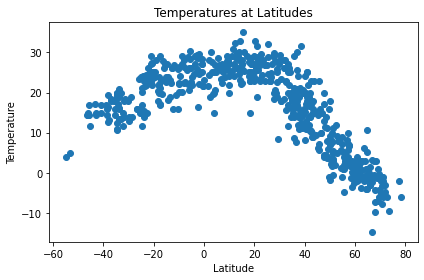

In [18]:
x_values = clean_city_df["latitude"]
y_values = clean_city_df["max_temp"]

plt.scatter(x_values, y_values)
plt.title('Temperatures at Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.tight_layout()
plt.savefig('temp_lat.png')

## Latitude vs. Humidity Plot

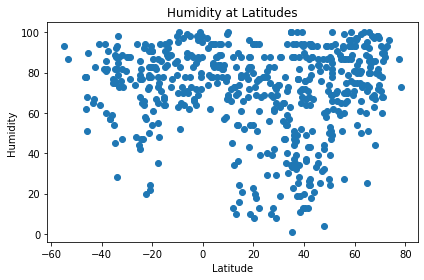

In [21]:
x_values = clean_city_df["latitude"]
y_values = clean_city_df["humidity"]

plt.scatter(x_values, y_values)
plt.title('Humidity at Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
plt.savefig('humidity_lat.png')

## Latitude vs. Cloudiness Plot

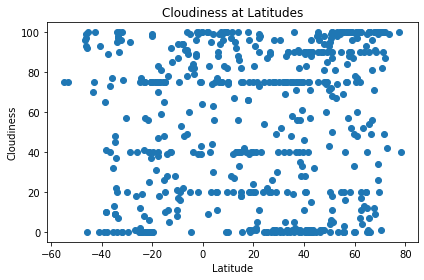

In [22]:
x_values = clean_city_df["latitude"]
y_values = clean_city_df["cloudiness"]

plt.scatter(x_values, y_values)
plt.title('Cloudiness at Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
plt.savefig('clouds_lat.png')

## Latitude vs. Wind Speed Plot

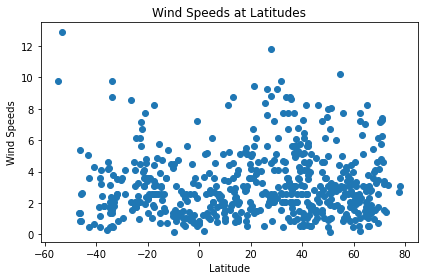

In [23]:
x_values = clean_city_df["latitude"]
y_values = clean_city_df["wind_speed"]

plt.scatter(x_values, y_values)
plt.title('Wind Speeds at Latitudes')
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds')
plt.tight_layout()
plt.savefig('wind_lat.png')

## Linear Regression

In [24]:
hemispheres = clean_city_df['latitude'] > 0
northern_hemisphere = clean_city_df[hemispheres]
southern_hemisphere = clean_city_df[~hemispheres]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

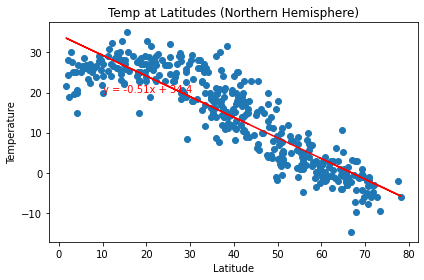

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = northern_hemisphere["latitude"]
y_values = northern_hemisphere["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Temp at Latitudes (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()
plt.savefig('temp_lat_north_regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

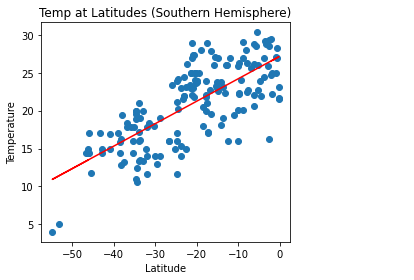

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = southern_hemisphere["latitude"]
y_values = southern_hemisphere["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Temp at Latitudes (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()
plt.savefig('temp_lat_south_regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

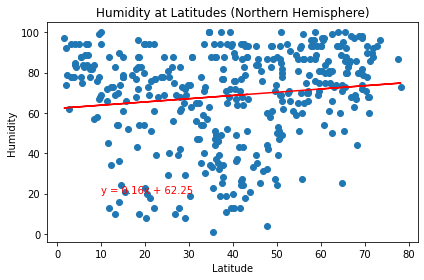

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = northern_hemisphere["latitude"]
y_values = northern_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Humidity at Latitudes (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()
plt.savefig('humidity_lat_north_regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemisphere["latitude"]
y_values = southern_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Humidity at Latitudes (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()
plt.savefig('humidity_lat_south_regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

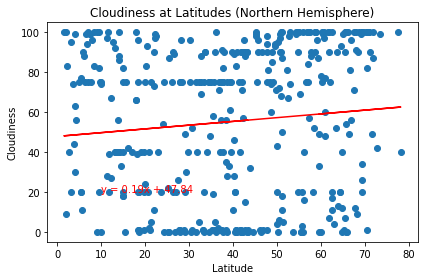

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = northern_hemisphere["latitude"]
y_values = northern_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitudes (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
plt.show()
plt.savefig('cloudiness_lat_north_regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

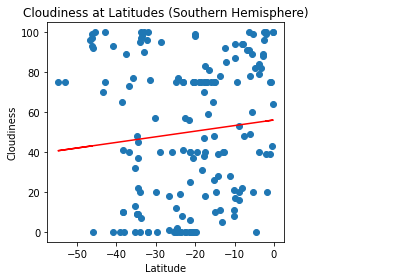

<Figure size 432x288 with 0 Axes>

In [40]:
x_values = southern_hemisphere["latitude"]
y_values = southern_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitudes (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
plt.show()
plt.savefig('cloudiness_lat_south_regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

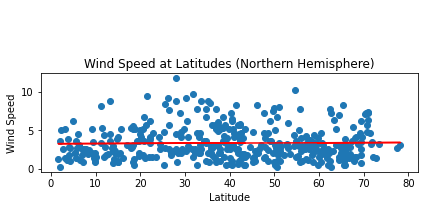

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = northern_hemisphere["latitude"]
y_values = northern_hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitudes (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()
plt.show()
plt.savefig('wind_lat_north_regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

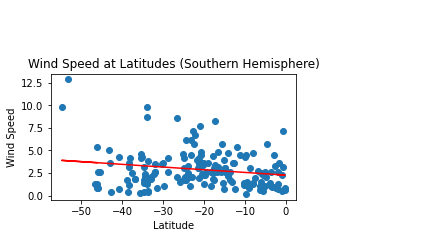

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = southern_hemisphere["latitude"]
y_values = southern_hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitudes (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()
plt.show()
plt.savefig('wind_lat_south_regression.png')